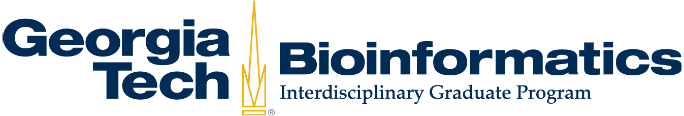

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>Shivam Sharma (shivamsharma13@gatech.edu), Nilavrah Sensarma (nsensarma3@gatech.edu), Bengy Gyimah-Asamoah, (bgyimaha3@gatech.edu)

</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 7 (Ploygenic Risk Scores) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 11th, 2023</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Knowing your data**
### *Total Questions: 5*
### *Total Points: 2+2+3+3+10 = 20*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Your Phenotype and Population of interest</h3>
    <p>Your group will select a 1000 Genome continental population and a disease/trait of interest.</p>
</div>

<div class="alert alert-block alert-success">
    <h3>Response 1.1</h3> 
    <p>Our disease of interest is: <'systemic lupus erythematosus'> and our population of interest is: <'EAS'> </p>
</div>

<div class="alert alert-block alert-warning">
    <h3>1.2 Check source VCF file</h3>
    <p>Show that you can access these VCF files. Show the first 10 variant IDs from chromosome 15.</p>
</div>

In [1]:
#Show the first 10 variant IDs from chromosome 15. You bash command goes here.
!zcat ~/biol6150/Data/1000Genomes/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | grep -v "##" | head -10 | cut -f-3

#CHROM	POS	ID
chr15	19794788	rs371549847
chr15	19794822	rs565090028
chr15	19794861	rs201219124
chr15	19794870	rs373298708
chr15	19794874	rs560310552
chr15	19794952	rs552896638
chr15	19794957	rs542841371
chr15	19794958	rs561207761
chr15	19794994	rs531597354
grep: write error: Broken pipe

gzip: stdout: Broken pipe


<div class="alert alert-block alert-warning">
    <h3>1.3 How many samples are present in these set of VCF files</h3>
    <p>You can do this using a series of bash commands, or a tool of your choice. But you have to show how you got the total number. You don't have to run this on all VCF files. Just one will work.</p>
</div>

In [2]:
#Get the samples present in the VCF file.
!bcftools stats ~/biol6150/Data/1000Genomes/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | grep 'number of samples'

SN	0	number of samples:	2504


<div class="alert alert-block alert-warning">
    <h3>1.4 How many variants are present in chromosome 12 VCF file</h3>
    <p>Use a tools or a bash command. Up to you.</p>
</div>

In [9]:
#Your command for getting the number of variants here.
!zcat ~/biol6150/Data/1000Genomes/phase3.chr12.GRCh38.GT.crossmap.vcf.gz | grep -v '##' | wc -l

3885459


<div class="alert alert-block alert-warning">
    <h3>1.5 Extract the samples of interest</h3>
    <p>You have source 1000 genomes files and a continental population of interest.</p>
    <p><b>1.5.1</b> Write the population codes that come from the continental population of interest</p>
    <p><b>1.5.2</b> Extract the samples that come from the selected continental population. The final output will be a set of 22 VCF GZ files that have a fraction of total samples present in the source VCF file. <b>Show and briefly explain any helper files you have used for this step.</b></p>
    <p><b>1.5.3</b> How many samples are present in your final VCF file?</p>
</div>

In [1]:
import pandas as pd
import os
import subprocess
import csv

In [2]:
#Write the 3 letter codes of the populations of interest.
igsr_df = pd.read_csv('~/project7_sandbox/igsr_samples.tsv', sep = '\t')
eas_df = igsr_df[igsr_df['Superpopulation code'] == 'EAS']
print(list(set(eas_df['Population code'])))

['JPT', 'CHB', 'CHS', 'CDX', 'KHV']


In [ ]:
#Write the commands used for extraction.
#get all ids in the vcf file
!bcftools query -l ~/biol6150/Data/1000Genomes/phase3.chr15.GRCh38.GT.crossmap.vcf.gz > ids.txt
ids_in_sample = []
with open("ids.txt", "r") as f:
    for line in f:
        ids_in_sample.append(line[:-1])
#subset to just those in population
ids_in_pop = list(eas_df['Sample name'])
ids_in_pop = list(set(ids_in_pop) & set(ids_in_sample))
#write ids in pop to a txt file to use for filtering by bcftools
!touch ~/project7_sandbox/ids_in_pop.txt
!touch 'ids_in_pop.txt'
with open("ids_in_pop.txt", "w") as f:
    for z in ids_in_pop:
        f.write(z + "\n")

We generate an "ids_in_pop" text file to use for filtering our VCF files down to only those IDs which are in our population of interest

In [ ]:
filenames = []
source_names = []
for file in os.listdir('/storage/ice-shared/biol6150/Data/1000Genomes'):
    filename = os.fsdecode(file)
    if filename.endswith(".vcf.gz"):
        filenames.append(f'./{filename}')
        source_names.append(f'/storage/ice-shared/biol6150/Data/1000Genomes/{filename}')
source_names[1]

In [ ]:
source_names[i]

In [ ]:
for i in range(1,len(source_names)): 
    subprocess.run(["bcftools", "view", "-S", "ids_in_pop.txt", "-Ov", "-o", filenames[i], source_names[i]])
    

# **2. PGS catalog**
### *Total Questions: 1*
### *Total Points: 20*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Select a PGS summary stat file</h3>
    <p>Go to PGS Catalog and find a summary statistics that is relevant to the continental population of interest and the disease assigned to you.</p>
    <p><b>2.1.1</b> Talk about why you selected this PGS file. (1-3 lines)</p>
    <p><b>2.1.2</b> Write the PGP and PGS website links for the files selected.</p>
    <p><b>2.1.3</b> Can you find the train and test sizes used in the publication? What was the distribtion (by continental ancestry; eg: European, African, EastAsian, etc.) for the samples used in training?</p>
</div>


### 2.1.1
This file was chosen because it contained a moderate number (113) of HG38 variants detected solely for the population of interest with an overlap of 7 variants in our 1000 genomes. Additionally we picked this since we are interested in autoimmune diseases like lupus.

### 2.1.2
- https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS003755/ScoringFiles/Harmonized/
- https://www.pgscatalog.org/score/PGS003755/
- https://europepmc.org/article/MED/33272962

### 2.1.3
The research team used 1,243 Korean individuals as train, and 412 as a hold out test set.


# **3. Polygenic risk scores**
### *Total Questions: 3*
### *Total Points: 15+30+15 = 60*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Harmonize the variant IDs between your VCF file and the PGS summary stat file</h3>
    <p>Variants are identified in a variety of ways (dbSNP) being one of them. It's a good idea to have one single VCF file and a single summary stat file.<b>Hint:</b> This might be a good time to convert your VCF files to a Plink2 format (makes things easier and faster)</p>
    <hr>
    <p><b>Question:</b> Write the % of variants present in the summary stat that are also present in your VCF file? Mention <b>total n</b> and <b>overlapping n.</b></p>
</div>

In [3]:
study_data = pd.read_csv('./study1.txt', sep = '\t')
study_data = study_data.iloc[:,:] 
#filter out na on chr and hm_pos
study_data['hm_chr'] = pd.to_numeric(study_data['hm_chr'], errors='coerce')
study_data['hm_pos'] = pd.to_numeric(study_data['hm_pos'], errors='coerce')
chna = study_data['hm_chr'].astype(float)
study_data = study_data[chna.isna() == False]
study_data.reset_index(inplace = True, drop = True)
posna = study_data['hm_pos'].astype(float)
study_data = study_data[posna.isna() == False]
study_data.reset_index(inplace = True, drop = True)
#create region data file
study_data['region'] = study_data['hm_chr'].astype(float).astype(int).astype(str) + '\t' + study_data['hm_pos'].astype(int).astype(str) + '\t' + (study_data['hm_pos'].astype(int) + 0).astype(str) + '\t' + study_data['other_allele'].astype(str) 
study_data['region'] = 'chr' + study_data['region']
study_data['region'].to_csv("rs_ids_interest.txt", sep = '\t', index=False, header=False, quoting=csv.QUOTE_NONE, escapechar='\t')

In [4]:

#combine all vcf files into 1 large one
for i in range(1,len(source_names)): 
    subprocess.run(["cp", str(source_names[i] + '.tbi'), str(filenames[i]+".tbi")])
!bcftools merge --force-samples -Oz -o combined_phase3.vcf.gz phase3.chr1.GRCh38.GT.crossmap.vcf.gz phase3.chr2.GRCh38.GT.crossmap.vcf.gz phase3.chr3.GRCh38.GT.crossmap.vcf.gz phase3.chr4.GRCh38.GT.crossmap.vcf.gz phase3.chr5.GRCh38.GT.crossmap.vcf.gz phase3.chr6.GRCh38.GT.crossmap.vcf.gz phase3.chr7.GRCh38.GT.crossmap.vcf.gz phase3.chr8.GRCh38.GT.crossmap.vcf.gz phase3.chr9.GRCh38.GT.crossmap.vcf.gz phase3.chr10.GRCh38.GT.crossmap.vcf.gz phase3.chr11.GRCh38.GT.crossmap.vcf.gz phase3.chr12.GRCh38.GT.crossmap.vcf.gz phase3.chr13.GRCh38.GT.crossmap.vcf.gz phase3.chr14.GRCh38.GT.crossmap.vcf.gz phase3.chr15.GRCh38.GT.crossmap.vcf.gz phase3.chr16.GRCh38.GT.crossmap.vcf.gz phase3.chr17.GRCh38.GT.crossmap.vcf.gz phase3.chr18.GRCh38.GT.crossmap.vcf.gz phase3.chr19.GRCh38.GT.crossmap.vcf.gz phase3.chr20.GRCh38.GT.crossmap.vcf.gz phase3.chr21.GRCh38.GT.crossmap.vcf.gz phase3.chr22.GRCh38.GT.crossmap.vcf.gz

#create index for phase3 for filtering
!tabix -p vcf combined_phase3.vcf.gz
#filter down to rsIDs of interest
!bcftools view -R ./rs_ids_interest.txt ./combined_phase3.vcf.gz -Oz -o ./combined_phase3_filtered.vcf.gz

#reformatting here, but not needed for our file since no duplicated rsIDs
#!bcftools view ./combined_phase3_filtered.vcf.gz | bcftools norm -m+  -Oz -o ./combined_phase3_filtered2.vcf.gz



In [5]:
#Show that the variant IDs are also overlapping.
!bcftools query -f '%ID\n' combined_phase3_filtered.vcf.gz > vcf_variant_ids.txt
!cut -f1 study1.txt | tail -n +2 > summary_stats_ids.txt
!grep -v "^#" summary_stats_ids.txt > stats_ids.txt
!comm -12 <(sort vcf_variant_ids.txt) <(sort stats_ids.txt) > overlapping_ids.txt

These 7 IDs overlap:

rs10823829
rs10995261
rs111447985
rs58164562
rs7097397
rs77448389
rs7902146


<div class="alert alert-block alert-warning">
    <h3>3.2 Calculate polygenic risk scores</h3>
    <p>Calculate the polygenic risk scores (for the disease of interest) for all the individuals belonging to the continental population of interest</p>
    <p>Please use Plink2 for calculating polygenic risk scores here (although more sophisticated tools exist and can be used in your own research)</p>
</div>

In [75]:
!plink2 --vcf ./combined_phase3_filtered.vcf.gz --extract overlapping_ids.txt --make-pgen --out filtered_variants
!plink2 --pfile filtered_variants --score study1.txt 1 3 5 header --out prs_results


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to filtered_variants.log.
Options in effect:
  --extract overlapping_ids.txt
  --make-pgen
  --out filtered_variants
  --vcf ./combined_phase3_filtered.vcf.gz

Start time: Fri Nov 15 14:54:25 2024
191549 MiB RAM detected, ~184267 available; reserving 95774 MiB for main
workspace.
Using up to 8 compute threads.
--vcf: 7 variants scanned.
--vcf: filtered_variants-temporary.pgen + filtered_variants-temporary.pvar.zst
+ filtered_variants-temporary.psam written.
11088 samples (0 females, 0 males, 11088 ambiguous; 11088 founders) loaded from
filtered_variants-temporary.psam.
7 variants loaded from filtered_variants-temporary.pvar.zst.
Note: No phenotype data present.
--extract: 7 variants remaining.
7 variants remaining after main filters.
Writing filtered_variants.psam ... done.
Writing filtered_variants.pvar ... 142842577185do

In [76]:
prs_outdf = pd.read_csv('prs_results.sscore', sep = '\t')
z = prs_outdf['#IID'].str.split(':')

ids = []
chrs = []
for i in range(len(z)):
    entry = z[i]
    if len(entry) == 1:
        ids.append(entry[0])
        chrs.append(1)
    else:
        ids.append(entry[1])
        chrs.append(int(entry[0]))
prs_outdf['id'] = ids
prs_outdf['chr'] = chrs
prs_outdf.drop(['#IID'], axis = 1, inplace = True)
prs_outdf['population'] = pd.merge(prs_outdf, eas_df[['Sample name', 'Population code']], how = 'left', left_on = 'id', right_on = 'Sample name')['Population code']
prs_outdf[['ALLELE_CT', 'SCORE1_AVG', 'id']].groupby(['id']).mean()

,ALLELE_CT,SCORE1_AVG
id,,
HG00403,0.636364,0.171116
HG00404,0.636364,0.162613
HG00406,0.636364,0.163240
HG00407,0.636364,0.169048
HG00409,0.636364,0.164915
...,...,...
NA19087,0.636364,0.164649
NA19088,0.636364,0.163477
NA19089,0.636364,0.165142


In [8]:
prs_outdf[['ALLELE_CT', 'SCORE1_AVG', 'population']].groupby(['population']).mean()

,ALLELE_CT,SCORE1_AVG
population,,
CDX,0.636364,0.164869
CHB,0.636364,0.164549
CHS,0.636364,0.164803
JPT,0.636364,0.164957
KHV,0.636364,0.165011


<div class="alert alert-block alert-warning">
    <h3>3.3 Visualize the scores by populations in the continental population of interest</h3>
    <p>You might want to scale the scores and use boxplots (or anything else you think that looks good).</p>
</div>

In [21]:
# Plots go here

grouped_data = [group["SCORE1_AVG"] for _, group in prs_outdf.groupby("population")]

/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


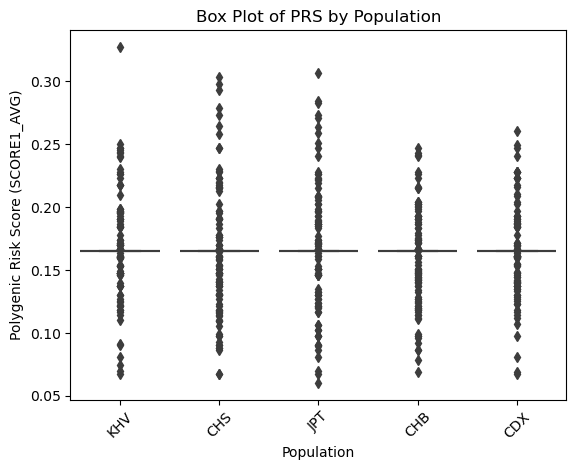

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming prs_outdf is already loaded as your DataFrame
sns.boxplot(x='population', y='SCORE1_AVG', data=prs_outdf)
plt.xlabel('Population')
plt.ylabel('Polygenic Risk Score (SCORE1_AVG)')
plt.title('Box Plot of PRS by Population')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [124]:
!awk '{$1 = "10:" $1; print}' metadata.txt | awk '$2 == "CDX" {print $1}'  | sort | uniq > CDX_subpop.txt
!bcftools view -S CDX_subpop.txt ./combined_phase3_filtered_small.vcf.gz -Ov -o CDX_.vcf.gz
!bcftools +fill-tags CDX_.vcf.gz -Oz -o CDX_af.vcf.gz -- -t AF
!bcftools query -f '%ID\t%AF\n' CDX_af.vcf.gz #> CDX_af.txt



rs77448389	0.150538
rs7902146	0.736559
rs10995261	0.193548
rs10823829	0.231183
rs111447985	0.0591398
rs58164562	0.139785


In [126]:
!awk '{$1 = "10:" $1; print}' metadata.txt | awk '$2 == "CHB" {print $1}'  | sort | uniq > CHB_subpop.txt
!bcftools view -S CHB_subpop.txt ./combined_phase3_filtered_small.vcf.gz -Ov -o CHB_.vcf.gz
!bcftools +fill-tags CHB_.vcf.gz -Oz -o CHB_af.vcf.gz -- -t AF
!bcftools query -f '%ID\t%AF\n' CHB_af.vcf.gz #> CDX_af.txt



rs77448389	0.0679612
rs7902146	0.742718
rs10995261	0.213592
rs10823829	0.296117
rs111447985	0.0728155
rs58164562	0.271845


In [127]:
!awk '$2 == "JPT" {print $1}'  metadata.txt | sort | uniq > JPT_subpop.txt
!awk '{$1 = "10:" $1; print}' metadata.txt | awk '$2 == "JPT" {print $1}'  | sort | uniq > JPT_subpop.txt
!bcftools view -S JPT_subpop.txt ./combined_phase3_filtered_small.vcf.gz -Ov -o JPT_.vcf.gz
!bcftools +fill-tags JPT_.vcf.gz -Oz -o JPT_af.vcf.gz -- -t AF
!bcftools query -f '%ID\t%AF\n' JPT_af.vcf.gz #> CDX_af.txt



rs77448389	0.0865385
rs7902146	0.663462
rs10995261	0.288462
rs10823829	0.322115
rs111447985	0.0769231
rs58164562	0.365385


In [131]:
!awk '{$1 = "10:" $1; print}' metadata.txt | awk '$2 == "CHS" {print $1}'  | sort | uniq > CHS_subpop.txt
!bcftools view -S CHS_subpop.txt ./combined_phase3_filtered_small.vcf.gz -Ov -o CHS_.vcf.gz
!bcftools +fill-tags CHS_.vcf.gz -Oz -o CHS_af.vcf.gz -- -t AF
!bcftools query -f '%ID\t%AF\n' CHS_af.vcf.gz #> CDX_af.txt



rs77448389	0.104762
rs7902146	0.72381
rs10995261	0.228571
rs10823829	0.27619
rs111447985	0.0952381
rs58164562	0.2


In [130]:
!awk '{$1 = "10:" $1; print}' metadata.txt | awk '$2 == "KHV" {print $1}'  | sort | uniq > KHV_subpop.txt
!bcftools view -S KHV_subpop.txt ./combined_phase3_filtered_small.vcf.gz -Ov -o KHV_.vcf.gz
!bcftools +fill-tags KHV_.vcf.gz -Oz -o KHV_af.vcf.gz -- -t AF
!bcftools query -f '%ID\t%AF\n' KHV_af.vcf.gz #> CDX_af.txt



rs77448389	0.106061
rs7902146	0.717172
rs10995261	0.217172
rs10823829	0.217172
rs111447985	0.10101
rs58164562	0.227273


In [156]:
print('CDX mean allele frequency for rsIDs of interest: ' + str(np.round(np.mean([0.150538, 0.736559, 0.193548, 0.231183, 0.0591398, 0.139785]), 3)))
print('CHB mean allele frequency for rsIDs of interest: ' + str(np.round(np.mean([0.0679612, 0.742718, 0.213592, 0.296117, 0.0728155, 0.271845]), 3)))
print('JPT mean allele frequency for rsIDs of interest: ' + str(np.round(np.mean([0.0865385, 0.663462, 0.288462, 0.322115, 0.0769231, 0.365385]), 3)))
print('CHS mean allele frequency for rsIDs of interest: ' + str(np.round(np.mean([0.104762, 0.72381, 0.228571, 0.27619, 0.0952381, 0.2]), 3)))
print('HKV mean allele frequency for rsIDs of interest: ' + str(np.round(np.mean([0.106061, 0.717172, 0.217172, 0.217172, 0.10101, 0.227273]), 3)))
                                                                
                                                                
                                                                

CDX mean allele frequency for rsIDs of interest: 0.252
CHB mean allele frequency for rsIDs of interest: 0.278
JPT mean allele frequency for rsIDs of interest: 0.3
CHS mean allele frequency for rsIDs of interest: 0.271
HKV mean allele frequency for rsIDs of interest: 0.264


Given the 1000 genomes files only had 7 of about 110 variants found in our study, with the rest all matching the GH38 reference, and given the appoximate matches of allele frequences across subpopulations, it is not supring that our polygenic risk scores across subpopulations is nearly the same